### Stochastic Gradient Descent
Stochastic Gradient Descent (SGD) is a variant of the gradient descent algorithm that updates the model parameters using only a single or a few training examples at each iteration, rather than the entire dataset. This makes SGD more efficient for large datasets and can help the model converge faster.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Generate synthetic data
np.random.seed(42)
x = 2*np.random.rand(100,1)
y= 4 + 3*x + np.random.randn(100,1)
# print(x)

In [8]:
def SGD(x,y,m=0,b=0,lr=0.01,epochs=1000):
    n=len(y)
    for _ in range(epochs):
        for i in range(n):
            xi=x[i]
            yi=y[i]
            y_pred = m*xi+b
            dm = -2 * xi * (yi-y_pred)
            db = -2 * (yi - y_pred)
            m -= lr * dm
            b -= lr * db
    return m, b

[2.8474106] [4.25560954]


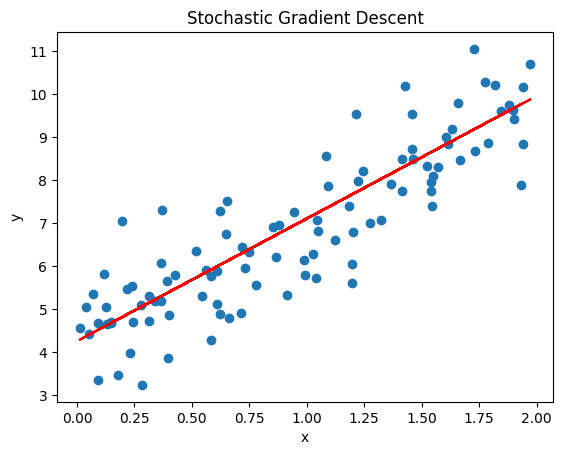

In [9]:
plt.scatter(x, y)
m, b = SGD(x,y)
print(m,b)
plt.plot(x,m*x+b,color='red')

plt.xlabel('x')
plt.ylabel('y')

plt.title('Stochastic Gradient Descent')
plt.show()

### Using Scikit-Learn (Shortcut)

Model: y = 2.72x + 4.30


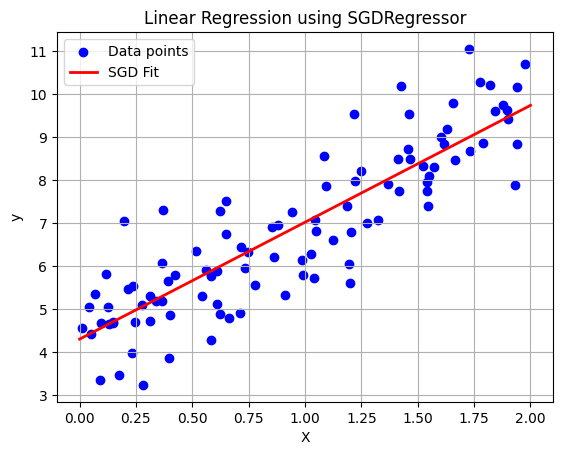

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Train SGDRegressor
sgd = SGDRegressor(max_iter=1000, tol=1e-3, learning_rate="constant", eta0=0.1)
sgd.fit(X, y.ravel())  # .ravel() fixes the warning

# Extract model parameters
m = sgd.coef_[0]
c = sgd.intercept_[0]
print(f"Model: y = {m:.2f}x + {c:.2f}")

# Predict values
X_new = np.linspace(0, 2, 100).reshape(-1, 1)  # evenly spaced points for line
y_pred = sgd.predict(X_new)

# Plot
plt.scatter(X, y, color="blue", label="Data points")
plt.plot(X_new, y_pred, color="red", linewidth=2, label="SGD Fit")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression using SGDRegressor")
plt.legend()
plt.grid(True)
plt.show()
